In [1]:
####This notebook required run on  parallel algorithms which base on MPI####
import  numpy  as  np
import libpysal as ps
from stwr.gwr import GWR, MGWR,STWR
from stwr.sel_bw import *
from stwr.utils import shift_colormap, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot
import pandas as pd
import math
from matplotlib.gridspec import GridSpec
import time
import csv 
import copy 

In [2]:
str_path = './TestDataSize 1k-10k/'
filenames = ['test_data_1000.csv','test_data_2000.csv','test_data_3000.csv',
            'test_data_4000.csv','test_data_5000.csv','test_data_6000.csv',
            'test_data_7000.csv','test_data_8000.csv','test_data_9000.csv','test_data_10000.csv']
Fast_time_consuming =[]
for file in filenames:
    csvfilename = str_path + file
    cal_coords_list =[]
    cal_y_list =[]
    cal_X_list =[]
    delt_stwr_intervel =[0.0]
    
    csvFile = open(csvfilename, "r")
    #ReadData form the floder to test comsuming time 
    df = pd.read_csv(csvFile,header = 0,names=['cal_coordsX','cal_coordsY','cal_x1','cal_x2','cal_y','time_stamp'],
                     dtype = {"cal_coordsX" : "float64","cal_coordsY":"float64",
                              "cal_x1":"float64","cal_x2":"float64",
                              "cal_y" : "float64",
                              "time_stamp":"float64"},
                     skip_blank_lines = True,
                     keep_default_na = False)
    df.info()
    df = df.sort_values(by=['time_stamp'])  
    all_data = df.values
    tick_time = all_data[0,-1]
    cal_coord_tick = []
    cal_X_tick =[]
    cal_y_tick =[]
    time_tol = 1.0e-7

    lensdata = len(all_data)
    for row in range(lensdata):
        cur_time = all_data[row,-1]
        if(abs(cur_time-tick_time)>time_tol):
            cal_coords_list.append(np.asarray(cal_coord_tick))
            cal_X_list.append(np.asarray(cal_X_tick))
            cal_y_list.append(np.asarray(cal_y_tick))
            delt_t = cur_time - tick_time
            delt_stwr_intervel.append(delt_t) 
            tick_time =cur_time
            cal_coord_tick = []
            cal_X_tick =[]
            cal_y_tick =[]
        coords_tick = np.array([all_data[row,0],all_data[row,1]])
        cal_coord_tick.append(coords_tick)
        x_tick = np.array([all_data[row,2],all_data[row,3]])
        cal_X_tick.append(x_tick)
        y_tick = np.array([all_data[row,4]])
        cal_y_tick.append(y_tick)
    cal_cord_gwr = np.asarray(cal_coord_tick)
    cal_X_gwr  = np.asarray(cal_X_tick)
    cal_y_gwr = np.asarray(cal_y_tick)  
    cal_coords_list.append(np.asarray(cal_coord_tick))
    cal_X_list.append(np.asarray(cal_X_tick))
    cal_y_list.append(np.asarray(cal_y_tick))

    start = time.time()
    
    #Fast-stwr 
    stwr_selector_ = Sel_Spt_BW(cal_coords_list, cal_y_list, cal_X_list,#gwr_bw0,
                                delt_stwr_intervel,spherical = False)
    #Here we use parallel algorithms.
    optalpha,optsita,opt_btticks,opt_gwr_bw0 = stwr_selector_.search(nproc = 12) 
    stwr_model = STWR(cal_coords_list,cal_y_list,cal_X_list,delt_stwr_intervel,
                      optsita,opt_gwr_bw0,tick_nums=opt_btticks,alpha =optalpha,spherical = False,recorded=1)   
    end = time.time()
    comsuming = end - start
    Fast_time_consuming.append(comsuming)
    str_comsuming = '{} seconds'.format(comsuming)
    strprint ='Time-consuming of Fast-STWR when calibrating the file: ('+ file + ' ) '+ str_comsuming
    print(strprint)
    stwr_results = stwr_model.fit()
    print(stwr_results.summary())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cal_coordsX  1000 non-null   float64
 1   cal_coordsY  1000 non-null   float64
 2   cal_x1       1000 non-null   float64
 3   cal_x2       1000 non-null   float64
 4   cal_y        1000 non-null   float64
 5   time_stamp   1000 non-null   float64
dtypes: float64(6)
memory usage: 54.7 KB
Time-consuming of Fast-STWR when calibrating the file: (test_data_1000.csv ) 0.40189433097839355 seconds
Model type                                                         Gaussian
Number of observations:                                                 400
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                        2904912.904
Log-li

Time-consuming of Fast-STWR when calibrating the file: (test_data_3000.csv ) 0.6362969875335693 seconds
Model type                                                         Gaussian
Number of observations:                                                1200
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                       29062481183839.023
Log-likelihood:                                                   -8232.425
AIC:                                                              16470.850
AICc:                                                             16472.917
BIC:                                                           29062481180020.055
R2:                                                                   0.216
Adj. R2:                                                              0.213

Variable            

Time-consuming of Fast-STWR when calibrating the file: (test_data_6000.csv ) 1.5109577178955078 seconds
Model type                                                         Gaussian
Number of observations:                                                2400
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                       10801301632470835200.000
Log-likelihood:                                                  -23744.399
AIC:                                                              47494.798
AICc:                                                             47496.832
BIC:                                                           10801301632470827008.000
R2:                                                                   0.007
Adj. R2:                                                              0.006

Variable

Model type                                                         Gaussian
Number of observations:                                                3200
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                       13866724101052264448.000
Log-likelihood:                                                  -31628.913
AIC:                                                              63263.827
AICc:                                                             63265.852
BIC:                                                           13866724101052252160.000
R2:                                                                   0.005
Adj. R2:                                                              0.004

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ----

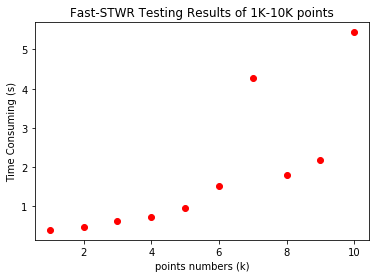

In [3]:
plt.plot([1, 2, 3, 4,5,6,7,8,9,10], Fast_time_consuming, 'ro')
plt.ylabel('Time Consuming (s)')
plt.xlabel('points numbers (k)')
plt.title('Fast-STWR Testing Results of 1K-10K points')
plt.show()